In [1]:
import os, sys

def read_train_dataset(mapper_classNames2Label, rootDatasetPath, datasetType='train_data'):
    '''
       @param datasetType: String 
       @param mapper_classNames2Label: dictionary "to map sudirectory to class label"
       @param rootDatasetPath: String 
       @return pathToImages: List of String
       @return labels: List of int
       
       @brief: read a train dataset with image files saved in subdirecties. Each subdirectory is class label.
    '''
    pathToImages= [];
    labels= [];

    for subdir in os.listdir( os.path.join(rootDatasetPath,datasetType) ):
        for fileName in os.listdir(os.path.join( rootDatasetPath, datasetType, subdir )):
            abs_pathToImg = os.path.join(rootDatasetPath, datasetType, subdir, fileName)
            pathToImages.append( abs_pathToImg );
            labels.append( mapper_classNames2Label[subdir] )
    return (pathToImages,labels)

def read_test_dataset(rootDatasetPath, datasetType='test_data'):
    pathToImages= [];
    labels= [];
   
    for fileName in os.listdir(os.path.join( rootDatasetPath, datasetType)):
        abs_pathToImg = os.path.join(rootDatasetPath, datasetType, fileName)
        pathToImages.append( abs_pathToImg );
    return pathToImages



#pathToImages


#pathToImages,labels=read_train_dataset(mapper_classNames2Label, datasetType='train_data')


In [2]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#fuction to plot an image
def plotAnImage(abs_pathToImage):
    '''
       @param abs_pathToImage: String
       @return void
       @brief: plot an image using matplotlib
    '''
    img=mpimg.imread(abs_pathToImage)
    plt.imshow(img)
    plt.show()
    

In [3]:
import skimage.transform
import numpy as np
from skimage.feature import hog



def get_ImageFeatures(pathToImages, RESIZE=224):
    features_allImages= []
    validIndices_readableImgPaths= []
    for i,eachPath in enumerate ( pathToImages):                     # read imageArray stored in a path
        try:
            imageArray= mpimg.imread(eachPath)
            resized_imageArray=skimage.transform.resize(imageArray, (RESIZE , RESIZE), order=1, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=True, anti_aliasing_sigma=None)        # resize imageArray        features, dummy = hog(resized_imageArray, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, multichannel=True)           # apply HOG, you will get features out of it
            features, dummy = hog(resized_imageArray, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, multichannel=True)
            features_allImages.append( features )
            validIndices_readableImgPaths.append(i)
            #print (i)

        except: 
            #print(eachPath)
            continue                             #outputs in array
    return (features_allImages,validIndices_readableImgPaths)


In [4]:
import os, sys

rootDatasetPath= "D:/BI_Project/Images"
train_rootDatasetPath = os.path.join(rootDatasetPath, "train_data")

mapper_classNames2Label=dict()
for subdir in os.listdir( train_rootDatasetPath ):
    if subdir.find("cat")>=0: #returns location of the word in the string 
        label=0
    else:
        label=1
    mapper_classNames2Label.update( {subdir:label} )

In [5]:
pathToTrainImages,trainLabels= read_train_dataset(mapper_classNames2Label,rootDatasetPath)

In [6]:
features_allTrainImages,validIndices_readableImgPaths = get_ImageFeatures(pathToTrainImages, RESIZE=224)


C:\Users\rajas\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [7]:
pathToTrainImages=  np.array(pathToTrainImages)[validIndices_readableImgPaths]
trainLabels= np.array(trainLabels)[validIndices_readableImgPaths]
features_allTrainImages= np.array(features_allTrainImages)

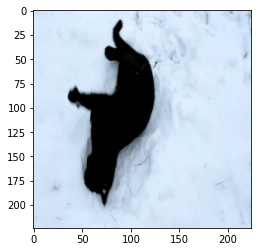

In [8]:
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


temp = pathToTrainImages[0]
img=mpimg.imread(temp)
imgplot = plt.imshow(img)
img.shape

import skimage.transform
resizedImage=skimage.transform.resize(img, (224,224) , order=1, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=True, anti_aliasing_sigma=None)
plt.imshow(resizedImage)


C:\Users\rajas\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


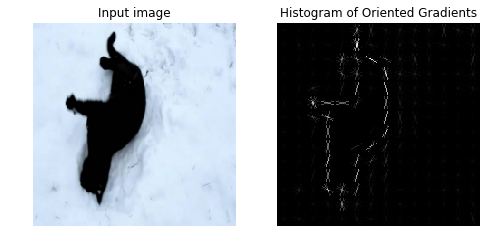

In [9]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image=resizedImage
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [10]:
import numpy as np
from sklearn import preprocessing, cross_validation
from sklearn.svm import LinearSVC

x_train, x_validation, y_train, y_validation = cross_validation.train_test_split(features_allTrainImages,trainLabels,test_size=0.3)


# print(x_train.shape)
# print(x_validation.shape)
# print(y_validation)

C:\Users\rajas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:

hyperParam_c= [0.00001,.0001,0.001,0.05,0.1,0.2,0.5,0.7,1,1.2,1.5,1.8,2.0,2.2,2.5,2.8,3.0,3.2,3.5,4.0]
squared_hinge_valAcc= []
for C in hyperParam_c:
    clf = LinearSVC(C=C, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='squared_hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    
    clf.fit(x_train, y_train)
       
    
    validation_accuracy=clf.score(x_validation, y_validation)
    squared_hinge_valAcc.append(validation_accuracy)
    

hinge_valAcc= []
hinge_trainAcc=[]
for C in hyperParam_c:
    clf = LinearSVC(C=C, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    
    clf.fit(x_train, y_train)
       
    
    validation_accuracy=clf.score(x_validation, y_validation)
    hinge_valAcc.append(validation_accuracy)


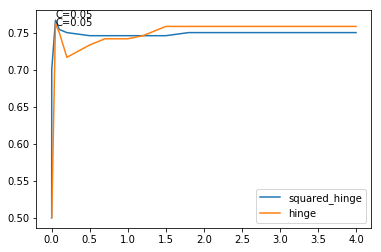

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def get_optimal_hyperParam_c(valAcc, hyperParam_c):
    max_val_acc=max(valAcc)
    index_max_val_acc=np.where(valAcc == max_val_acc)[0][0]
    return (hyperParam_c[index_max_val_acc], round(max(valAcc),2))

t = np.array(hyperParam_c)

plt.plot( hyperParam_c, squared_hinge_valAcc, label='squared_hinge')
xy=get_optimal_hyperParam_c(squared_hinge_valAcc, hyperParam_c)
plt.annotate('C={}'.format(xy[0]), xy=xy)

plt.plot( hyperParam_c,hinge_valAcc, label='hinge')
xy=get_optimal_hyperParam_c(hinge_valAcc, hyperParam_c)
plt.annotate('C={}'.format(xy[0]), xy=xy)

np.max(hyperParam_c)

plt.legend()
plt.show()

In [13]:
pathToTestImages=read_test_dataset(rootDatasetPath)

In [14]:
features_allTestImages,validIndices_readableImgPaths = get_ImageFeatures(pathToTestImages, RESIZE=224)

C:\Users\rajas\Anaconda3\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [15]:
pathToTestImages=  np.array(pathToTestImages)[validIndices_readableImgPaths]
#trainLabels= np.array(trainLabels)[validIndices_readableImgPaths]
features_allTestImages= np.array(features_allTestImages)

In [23]:
clf = LinearSVC(C=0.07, class_weight=None, dual=True, fit_intercept=True,
             intercept_scaling=1, loss='hinge', max_iter=1000,
             multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    
clf.fit(features_allTrainImages, trainLabels)
#test_accuracy = clf.score(features_allTestImages, testLabels)
#print ("test_accuracy = {}".format(test_accuracy))
train_accuracy = clf.score(features_allTrainImages, trainLabels)
print ("train_accuracy = {}".format(train_accuracy))
predicted_lables= clf.predict(features_allTestImages)

train_accuracy = 0.9325


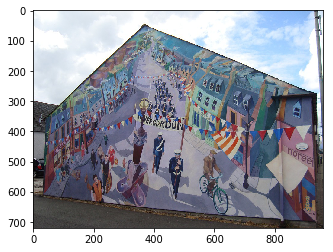

predicted result = house


In [17]:

def visualize_predictions(visualize_index, pathToTestImages, labels_predicted):
    plotAnImage(pathToTestImages[visualize_index])
    if labels_predicted[visualize_index]==0:
        print("predicted result = {}".format("cat"))
    else:
        print("predicted result = {}".format("house"))
        
visualize_predictions(0, pathToTestImages, predicted_lables)


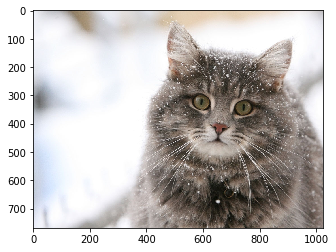

predicted result = house


In [18]:
visualize_predictions(80, pathToTestImages, predicted_lables)

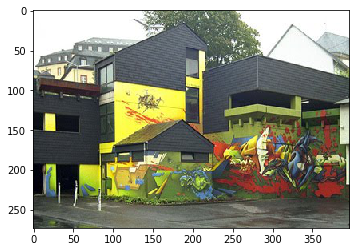

predicted result = house


In [19]:
visualize_predictions(55, pathToTestImages, predicted_lables)

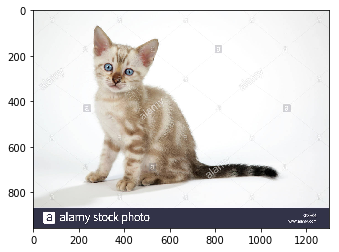

predicted result = cat


In [20]:
visualize_predictions(5, pathToTestImages, predicted_lables)

In [21]:

# import numpy as np
# features_allImages= []
# validIndices_readableImgPaths= []
# for i,eachPath in enumerate ( pathToImages):                     # read imageArray stored in a path
#     try:
#         imageArray= mpimg.imread(eachPath)
#         resized_imageArray=skimage.transform.resize(imageArray, (RESIZE , RESIZE), order=1, mode='reflect', cval=0, clip=True, preserve_range=False, anti_aliasing=True, anti_aliasing_sigma=None)        # resize imageArray        features, dummy = hog(resized_imageArray, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, multichannel=True)           # apply HOG, you will get features out of it
#         features, dummy = hog(resized_imageArray, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1), visualize=True, multichannel=True)
#         features_allImages.append( features )
#         validIndices_readableImgPaths.append(i)
#         #print (i)
        
#     except: 
#         #print(eachPath)
#         continue
        



In [22]:
# import numpy as np
# from sklearn import preprocessing, cross_validation
# from sklearn.svm import LinearSVC

# x_train, x_validation, y_train, y_validation = cross_validation.train_test_split(features_allTrainImages,trainLabels,test_size=0.2)
# clf = LinearSVC(C=C, class_weight=None, dual=True, fit_intercept=True,
#              intercept_scaling=1, loss='squared_hinge', max_iter=1000,
#              multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
# clf.fit(x_train, y_train)

# train_accuracy=clf.score(x_train, y_train)
# print("{} on train images".format(train_accuracy*100))
# validation_accuracy=clf.score(x_validation, y_validation)
# print("{} on validation images".format(validation_accuracy*100))